<a href="https://colab.research.google.com/github/aycaaktas/CS210-Data_Science/blob/main/CS210_Spring2021_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Bitcoin Price Prediction Project  - Group 21]
Group Members:

*   BERFU EVLİYA
*   AYÇA ELİF AKTAŞ
*   ALİ VEHBİ GÜNEYSU
*   UĞUR YÜCE








## Introduction

<font color="white
">
In this project, our aim is to analyze dataset that given to us about cryptocurrency Bitcoin. In this file Kaggle’s datasets that are related to Bitcoin features are used. Those datasets include such as date opening bid price, high and low of the days, close price, and the volume of trade spanning over approximately last eight years. Our goal is to explore data.

</font>

```
# Finding where dataset located
```

---

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive



```
# Installing Required Libraries
```

---

In [ ]:
!pip install reverse_geocoder
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 5.4 MB/s 
  Created wheel for reverse-geocoder: filename=reverse_geocoder-1.5.1-py3-none-any.whl size=2268088 sha256=8a79704324d16f4b3e8599c4a85c9ba7c2ca9b5c915f2f27232c8c9626f9eb56
  Stored in directory: /root/.cache/pip/wheels/34/6e/70/5423639428a2cac8ea7eb467214a4254b549b381f306a9c790
Successfully built reverse-geocoder
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



```
# Importing needed libraries to our project
```

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM



```
# Defining data sets
```

---

In [ ]:
filename = "BTC-USD.csv"
df = pd.read_csv(join(path_prefix, filename))
fnameAdd1 = "BTC-Daily.csv"
df2 = pd.read_csv(join(path_prefix, fnameAdd1))
fnameAdd2 = "coin_Bitcoin.csv"
df3 = pd.read_csv(join(path_prefix, fnameAdd2))
df4 = pd.read_csv(join(path_prefix, filename))
fnameAdd3 = "coin_Dogecoin.csv"
df_doge = pd.read_csv(join(path_prefix, fnameAdd3))
fnameAdd4 = "coin_Ethereum.csv"
df_eth = pd.read_csv(join(path_prefix, fnameAdd4))
fnameAdd5 = "coin_USDCoin.csv"
df_usd = pd.read_csv(join(path_prefix, fnameAdd5))
fnameAdd6 = "gold_price.csv"
df_gold = pd.read_csv(join(path_prefix, fnameAdd6))

FileNotFoundError: ignored


```
# Showing detailed information of main dataset
```

---

In [ ]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2755 non-null   object 
 1   Open       2755 non-null   float64
 2   High       2755 non-null   float64
 3   Low        2755 non-null   float64
 4   Close      2755 non-null   float64
 5   Adj Close  2755 non-null   float64
 6   Volume     2755 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.8+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2755.000000,2755.000000,2755.000000,2755.000000,2755.000000,2.755000e+03
mean,11768.664114,12082.896368,11425.227294,11783.725409,11783.725409,1.489443e+10
std,16405.233671,16841.443821,15910.212812,16413.271203,16413.271203,1.994140e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,609.777497,612.311005,606.981994,609.804504,609.804504,8.172330e+07
50%,6380.379883,6504.649902,6297.930176,6385.819824,6385.819824,5.262698e+09
75%,10795.780762,11047.681152,10485.476074,10788.915528,10788.915528,2.512467e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [ ]:
df.shape

(2755, 7)

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2750,False,False,False,False,False,False,False
2751,False,False,False,False,False,False,False
2752,False,False,False,False,False,False,False
2753,False,False,False,False,False,False,False


In [ ]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


```
# Transforming 'Date' from Object to Datetime
```

---

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


### Utilized Datasets

<font color="white">
If you are using additional datasets, describe them in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps the reader understand what you are dealing with.
</font>

Additional Dataset 1: [Cryptocurrency Historical Prices](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory?select=coin_Bitcoin.csv)

This dataset is used to see old years which are not included in our main dataset and increasing the reliability with compare two dataset for same features.
***
Additional Data Set 2: [Bitcoin Historical Dataset](https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd?select=BTC-Daily.csv)

This dataset is used for increasing relaibility of our research. Since it has same information with the our main dataset, informations can be compared.
***
***Detailed information of data sets such as number of observations, data types are below.**


```
# Showing detailed informaiton of additional dataset 1
```

---

In [ ]:
df2.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   date        2651 non-null   object 
 2   symbol      2651 non-null   object 
 3   open        2651 non-null   float64
 4   high        2651 non-null   float64
 5   low         2651 non-null   float64
 6   close       2651 non-null   float64
 7   Volume BTC  2651 non-null   float64
 8   Volume USD  2651 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 186.5+ KB


In [ ]:
df2.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


In [ ]:
df2.shape

(2651, 9)

In [ ]:
df2.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [ ]:
df2.isna()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2646,False,False,False,False,False,False,False,False,False
2647,False,False,False,False,False,False,False,False,False
2648,False,False,False,False,False,False,False,False,False
2649,False,False,False,False,False,False,False,False,False


In [ ]:
df2.isna().sum()

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64


```
# Showing detailed informaiton of additional dataset 2
```

---

In [ ]:
df3.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [ ]:
df3.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [ ]:
df3.shape

(2991, 10)

In [ ]:
df3.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [ ]:
df3.isna()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2986,False,False,False,False,False,False,False,False,False,False
2987,False,False,False,False,False,False,False,False,False,False
2988,False,False,False,False,False,False,False,False,False,False
2989,False,False,False,False,False,False,False,False,False,False


In [ ]:
df3.isna().sum()

SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

## Exploratory Data Analysis

<font color="white">

</font>

```
--> Visualization of descriptive statistics of the dataset. Visualization of price trends based on time series and volume.
--> Visualization of each feature separately based on time series.
--> Example visualizations of aggregated forms based on features (e.g. group the dataset based on open and/or close prices with respect to 
volumes and compare distributions or centrality metrics of these features for different open/close prices)
--> Analysis of the highest and lowest price of all time with respect to volume.
--> Analysis of how high & low prices change with respect to time.
--> Comparison of open, close, high and low prices for selected time range and volume
--> Introduction of at least four new features from additional datasets and visual explanations of them
--> For both existing and new features, and usage of spatial visualization examples (as much as possible) are expected.
```




```
# Visualization of descriptive statistics of the dataset. Visualization of price trends based on time series and volume.

```

---

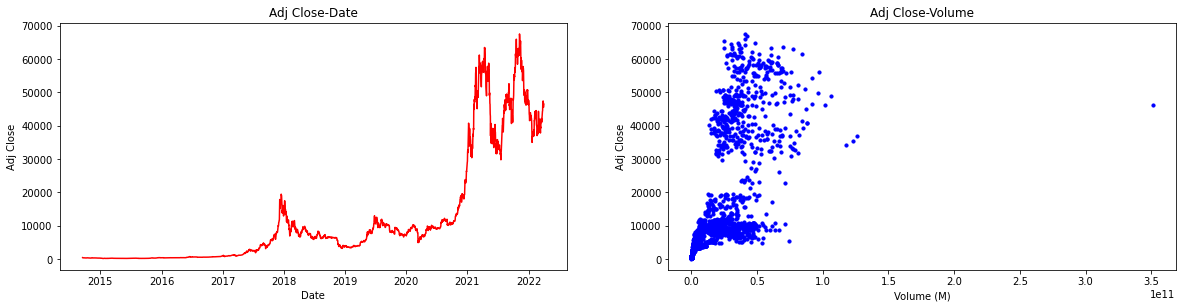

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)   
plt.plot(df.Date,df["Adj Close"],color="r") 
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.title("Adj Close-Date")

plt.subplot(2,2,2)
plt.scatter(df.Volume,df["Adj Close"],color="blue", s=10)
plt.xlabel("Volume (M)")
plt.ylabel("Adj Close")
plt.title("Adj Close-Volume")

plt.show()


```
# Visualization of each feature separately based on time series.

```

---

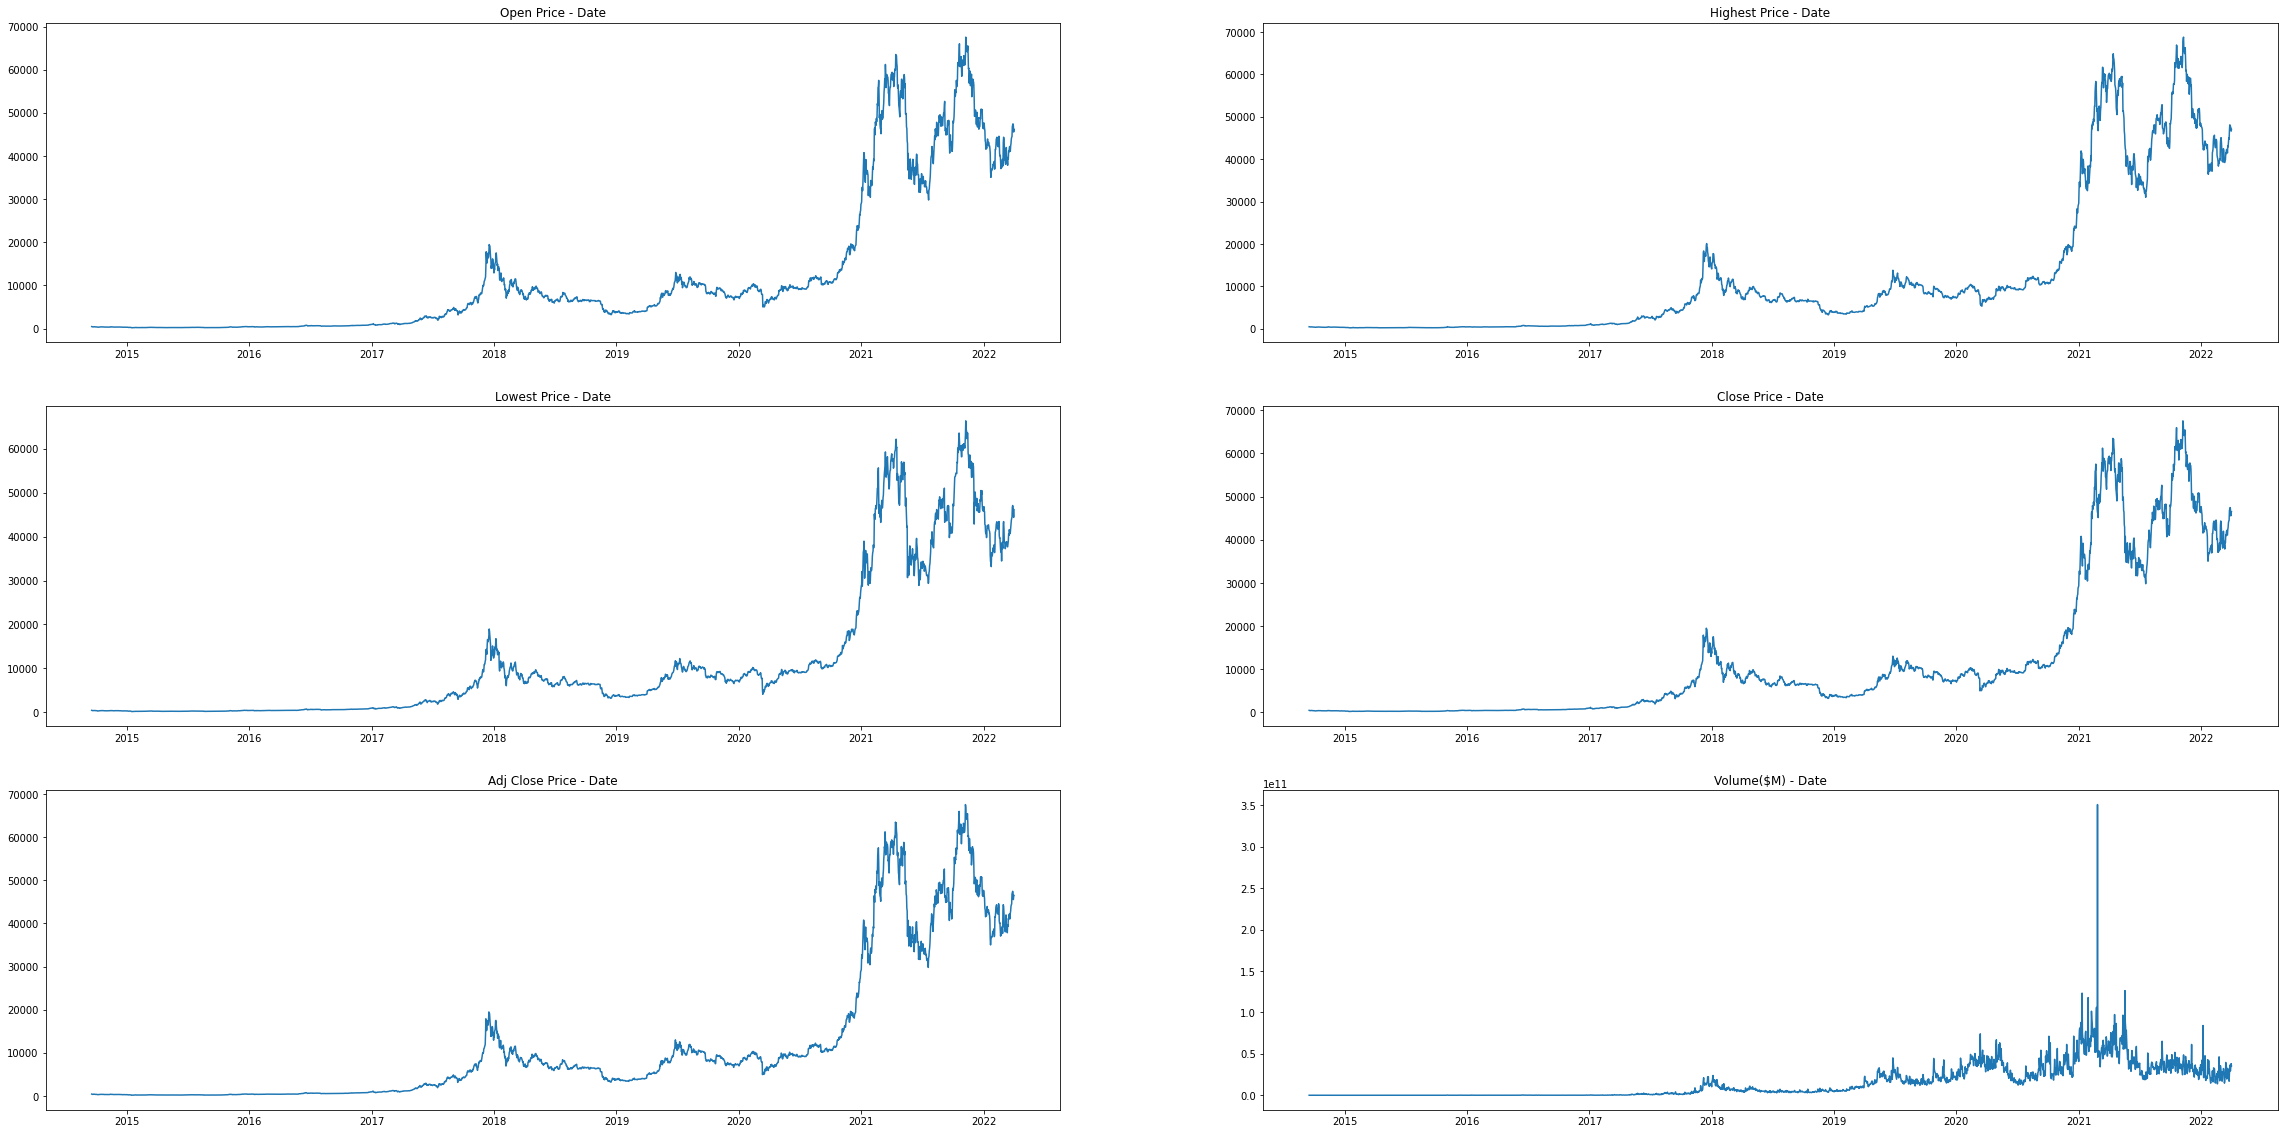

In [ ]:
plt.figure(figsize=(40,20))

plt.subplot(3,2,1)   
plt.title("Open Price - Date")
plt.plot(df.Date,df.Open) 

plt.subplot(3,2,2)
plt.title("Highest Price - Date")
plt.plot(df.Date,df.High) 

plt.subplot(3,2,3)   
plt.title("Lowest Price - Date")
plt.plot(df.Date,df.Low)

plt.subplot(3,2,4)
plt.title("Close Price - Date")
plt.plot(df.Date,df.Close)

plt.subplot(3,2,5)
plt.title("Adj Close Price - Date")
plt.plot(df.Date,df["Adj Close"])

plt.subplot(3,2,6)
plt.title("Volume($M) - Date")
plt.plot(df.Date,df.Volume)

plt.show()

```
# Example visualizations of aggregated forms based on features (e.g. group the dataset based on open and/or 
close prices with respect to volumes and compare distributions or centrality metrics of these features for different open/close prices)

```

---

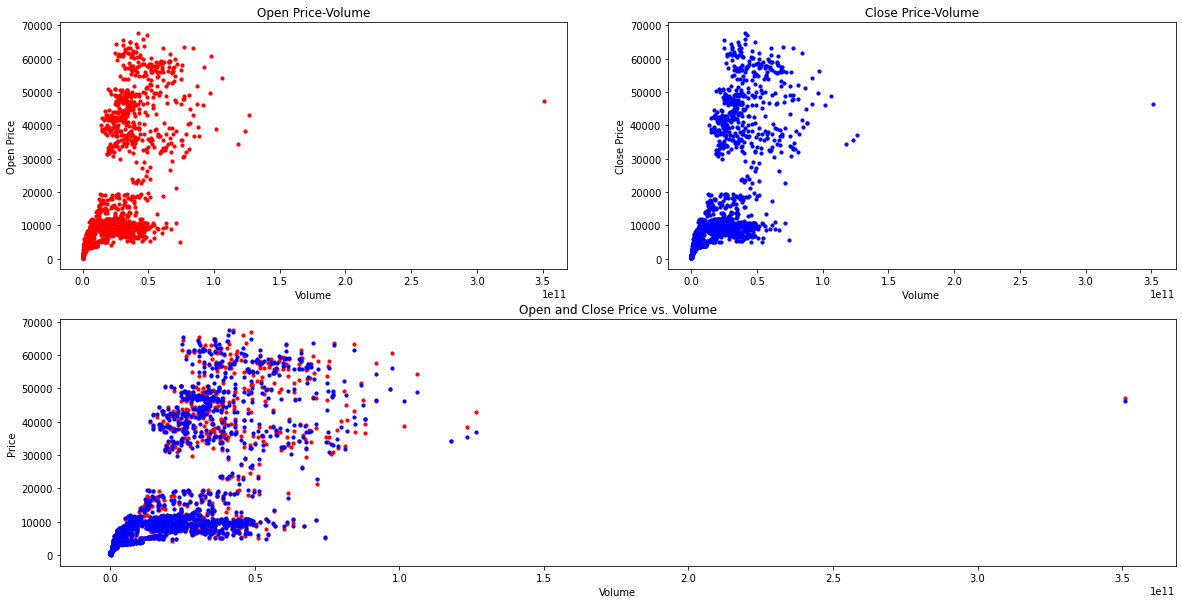

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)   
plt.scatter(df.Volume,df["Open"],color="red",s=10) 
plt.xlabel("Volume")
plt.ylabel("Open Price")
plt.title("Open Price-Volume")

plt.subplot(2,2,2)
plt.scatter(df.Volume,df["Close"],color="blue", s=10)
plt.xlabel("Volume ")
plt.ylabel("Close Price")
plt.title("Close Price-Volume")


plt.subplot(2,1,2)

plt.scatter(df.Volume,df.Open,color="red",s = 10) 

plt.scatter(df.Volume,df.Close,color="blue",s = 10)

plt.xlabel("Volume")

plt.ylabel("Price")

plt.title("Open and Close Price vs. Volume")





plt.show()


```
# Analysis of the highest and lowest price of all time with respect to volume.

```

---

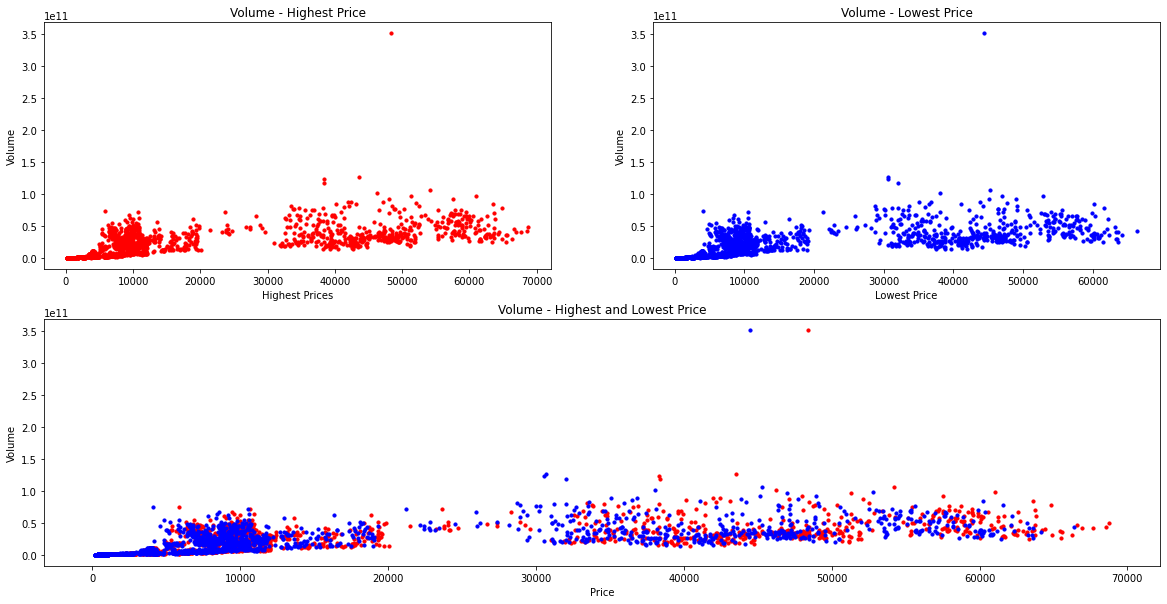

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)   
plt.scatter(df.High,df.Volume,color="red",s = 10) 
plt.xlabel("Highest Prices")
plt.ylabel("Volume")
plt.title("Volume - Highest Price")

plt.subplot(2,2,2)
plt.scatter(df.Low,df.Volume,color="blue",s = 10)
plt.xlabel("Lowest Price")
plt.ylabel("Volume")
plt.title("Volume - Lowest Price")

plt.subplot(2,1,2)

plt.scatter(df.High,df.Volume,color="red",s = 10) 
plt.scatter(df.Low,df.Volume,color="blue",s = 10)

plt.xlabel("Price")
plt.ylabel("Volume")
plt.title("Volume - Highest and Lowest Price")


plt.show()


```
# Analysis of how high & low prices change with respect to time.

```

---

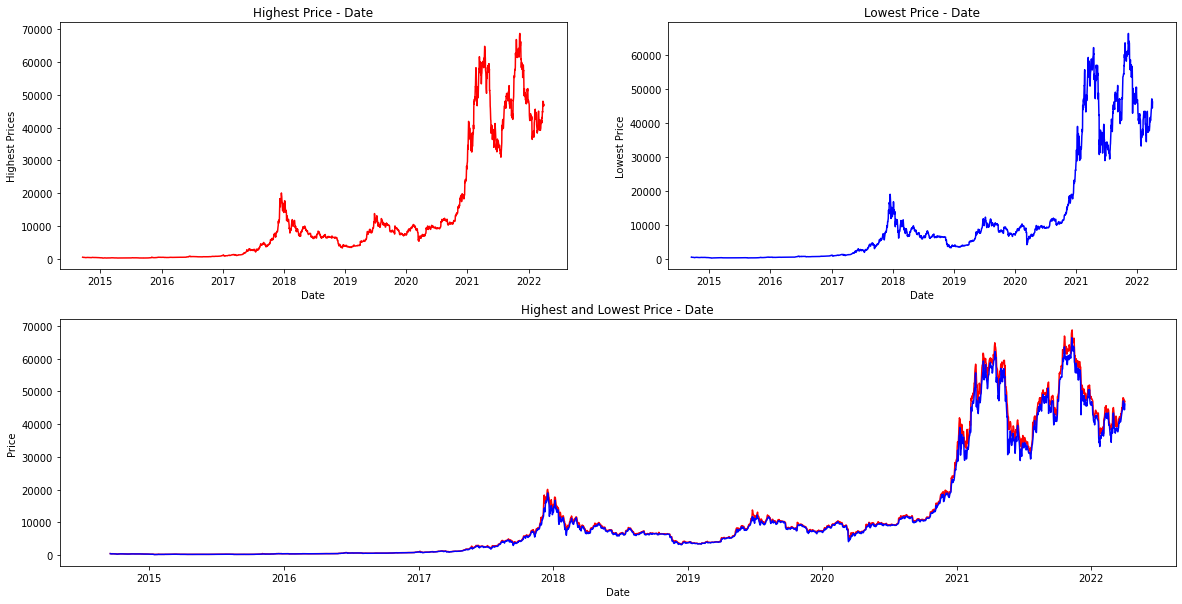

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)   
plt.plot(df.Date[0:],df.High[0:],color="red") 
plt.xlabel("Date")
plt.ylabel("Highest Prices")
plt.title("Highest Price - Date")

plt.subplot(2,2,2)
plt.plot(df.Date[0:],df.Low[0:],color="blue")
plt.xlabel("Date")
plt.ylabel("Lowest Price")
plt.title("Lowest Price - Date")

plt.subplot(2,1,2)

plt.plot(df.Date[0:],df.High[0:],color="red") 

plt.plot(df.Date,df.Low,color="blue")

plt.xlabel("Date")

plt.ylabel("Price")

plt.title("Highest and Lowest Price - Date")


plt.show()



```
# Comparison of open, close, high and low prices for selected time range and volume

```

---

Please enter the start date(in Year-Month-Day format): 2015-01-01
Please enter the end date(in Year-Month-Day format): 2016-01-01


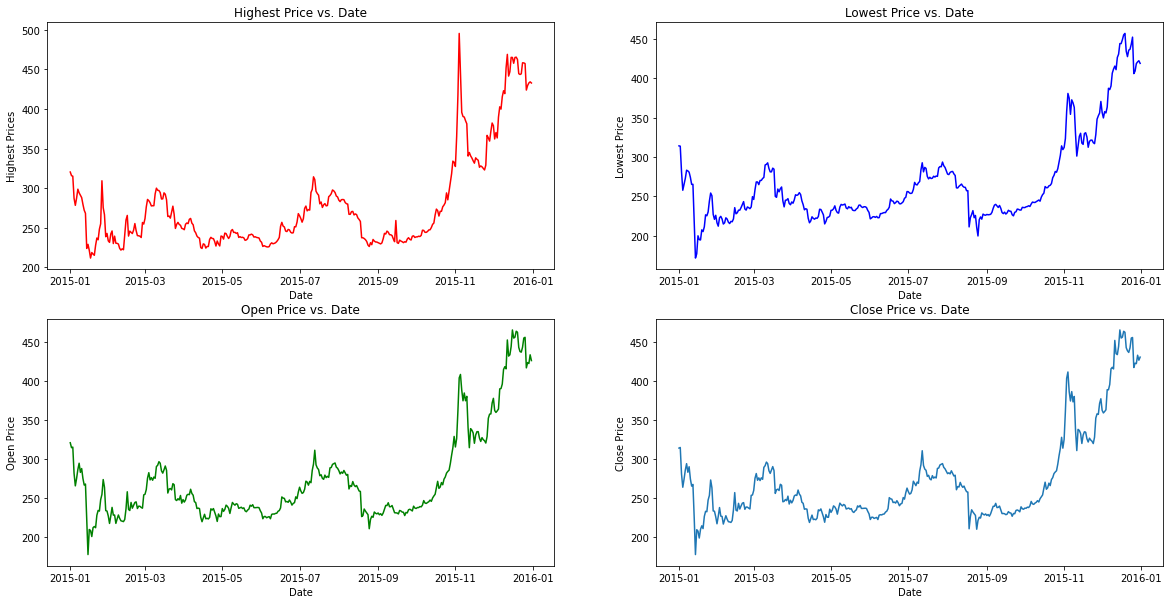

In [ ]:
x = 0
y=0
start_index = 0
end_index = 0
start = input("Please enter the start date(in Year-Month-Day format): ")
end = input("Please enter the end date(in Year-Month-Day format): ")
while x < 2731:
  if str(df.Date[x]) <= start:
    x+=1
    start_index = x
  
  else:
    x+=1

while y <= 2730:
  if str(df.Date[y]) <= end:
    y+=1
    end_index = y
  
  else:
    y+=1
#the purpose of code which is above is to restrict date range according to what user wants.

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)   
plt.plot(df.Date[start_index:end_index],df.High[start_index:end_index],color="red") 
plt.xlabel("Date")
plt.ylabel("Highest Prices")
plt.title("Highest Price vs. Date")

plt.subplot(2,2,2)
plt.plot(df.Date[start_index:end_index],df.Low[start_index:end_index],color="blue") 
plt.xlabel("Date")
plt.ylabel("Lowest Price")
plt.title("Lowest Price vs. Date") 

plt.subplot(2,2,3)
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.title("Open Price vs. Date") 
plt.plot(df.Date[start_index:end_index],df.Open[start_index:end_index],color="green")

plt.subplot(2,2,4)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Close Price vs. Date") 
plt.plot(df.Date[start_index:end_index],df.Close[start_index:end_index])

In [ ]:
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2.sort_index(ascending=False)
df2.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
2650,1417132800,2014-11-28,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2649,1417219200,2014-11-29,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2648,1417305600,2014-11-30,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2647,1417392000,2014-12-01,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2646,1417478400,2014-12-02,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


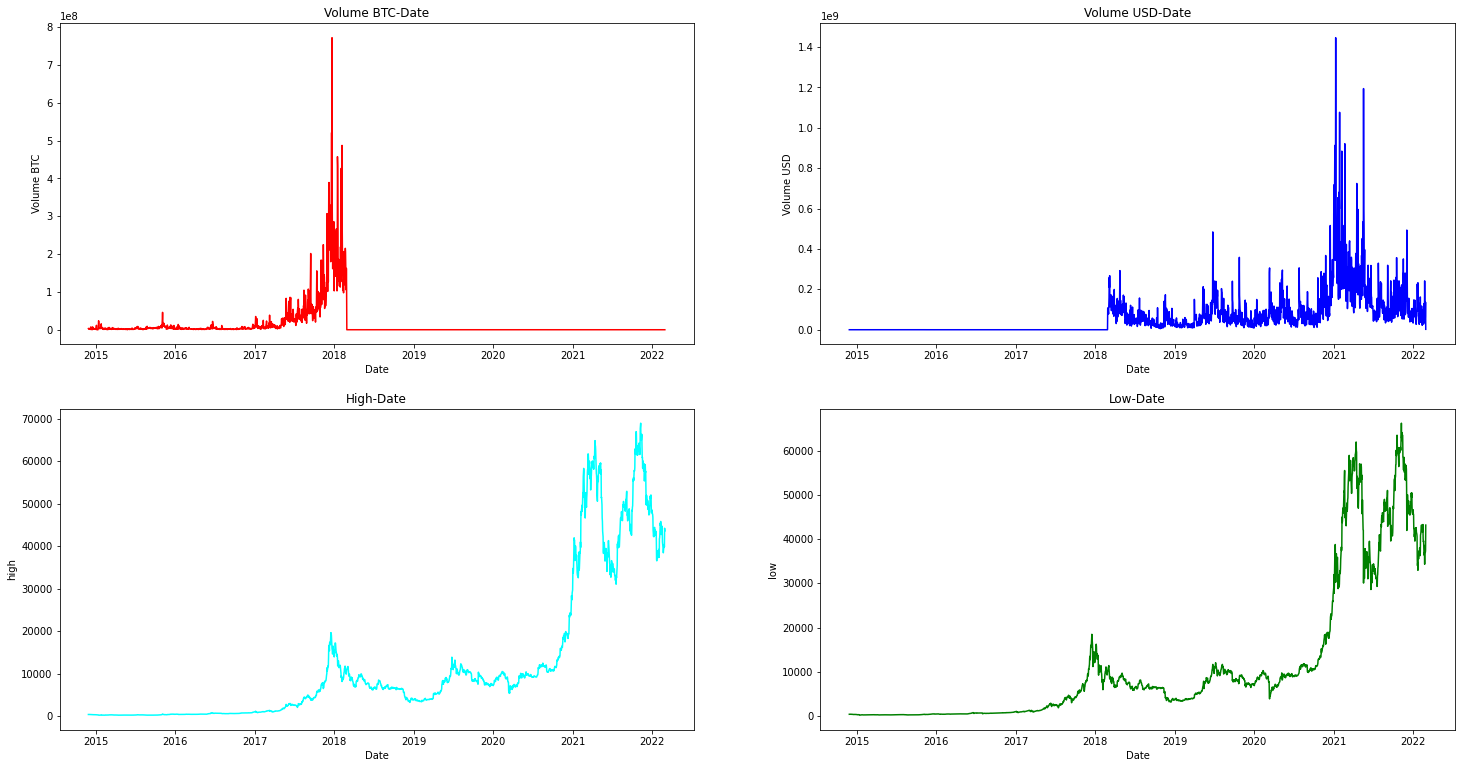

In [ ]:
plt.figure(figsize=(25,13))

plt.subplot(2,2,1)   
plt.plot(df2.date,df2["Volume BTC"],color="r") 
plt.xlabel("Date")
plt.ylabel("Volume BTC")
plt.title("Volume BTC-Date")

plt.subplot(2,2,2)   
plt.plot(df2.date,df2["Volume USD"],color="BLUE") 
plt.xlabel("Date")
plt.ylabel("Volume USD")
plt.title("Volume USD-Date")

plt.subplot(2,2,3)   
plt.plot(df2.date,df2["high"],color="cyan") 
plt.xlabel("Date")
plt.ylabel("high")
plt.title("High-Date")

plt.subplot(2,2,4)   
plt.plot(df2.date,df2["low"],color="g") 
plt.xlabel("Date")
plt.ylabel("low")
plt.title("Low-Date")



plt.show()

```
# Using additional 4 data sets which include Ethereum, USD Coin, Dogecoin and Ons Gold Price to understand 
if they have impact on Bitcoin price or not. 
```

---

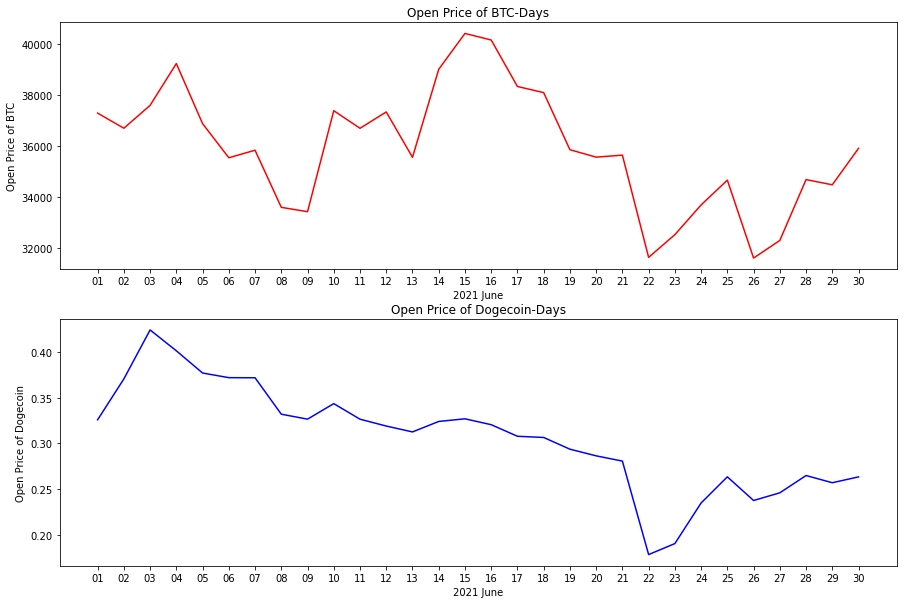

In [ ]:
plt.figure(figsize=(15,10))

df3_copy = df3.Date.str
df3_copy = df3_copy[8:10]

dfDoge_copy = df_doge.Date.str
dfDoge_copy = dfDoge_copy[8:10]


plt.subplot(2,1,1)   
plt.plot(df3_copy[2955:2985],df3.Open[2955:2985],color="r") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of BTC")
plt.title("Open Price of BTC-Days")

plt.subplot(2,1,2)   
plt.plot(dfDoge_copy[2724:2754],df_doge.Open[2724:2754],color="BLUE") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of Dogecoin")
plt.title("Open Price of Dogecoin-Days")

plt.show()


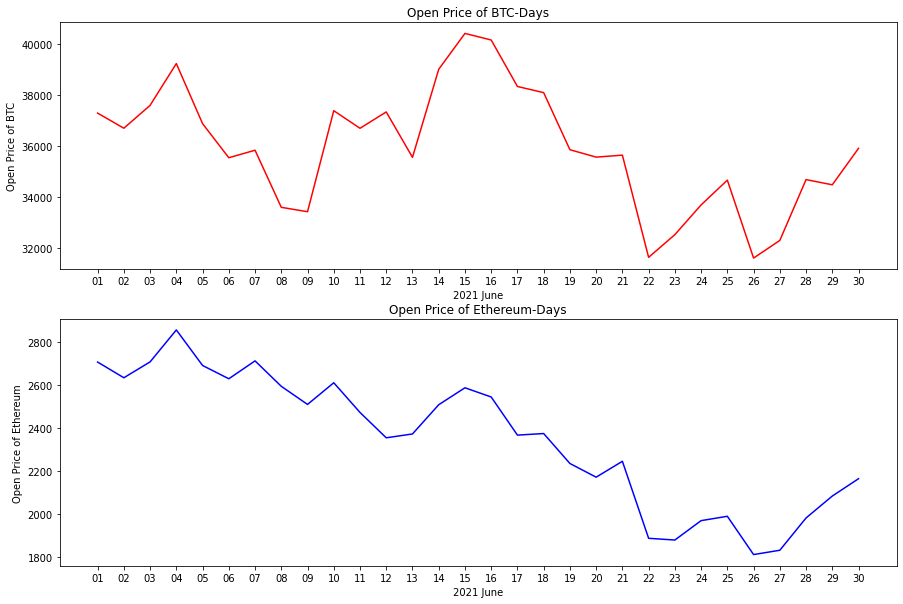

In [ ]:
plt.figure(figsize=(15,10))

df3_copy = df3.Date.str
df3_copy = df3_copy[8:10]

dfEth_copy = df_eth.Date.str
dfEth_copy = dfEth_copy[8:10]


plt.subplot(2,1,1)   
plt.plot(df3_copy[2955:2985],df3.Open[2955:2985],color="r") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of BTC")
plt.title("Open Price of BTC-Days")

plt.subplot(2,1,2)   
plt.plot(dfEth_copy[2124:2154],df_eth.Open[2124:2154],color="BLUE") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of Ethereum")
plt.title("Open Price of Ethereum-Days")

plt.show()

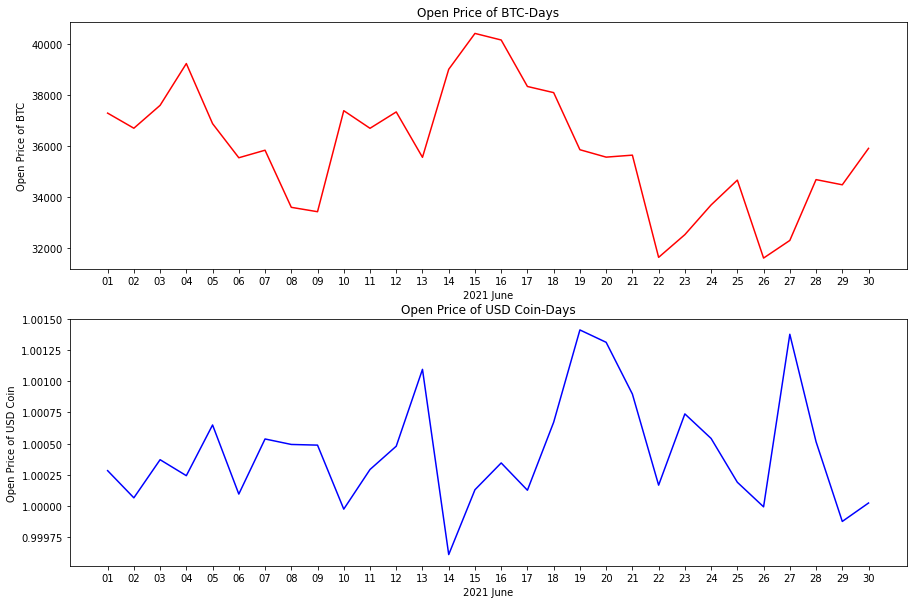

In [ ]:
plt.figure(figsize=(15,10))

df3_copy = df3.Date.str
df3_copy = df3_copy[8:10]

dfUsd_copy = df_usd.Date.str
dfUsd_copy = dfUsd_copy[8:10]


plt.subplot(2,1,1)   
plt.plot(df3_copy[2955:2985],df3.Open[2955:2985],color="r") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of BTC")
plt.title("Open Price of BTC-Days")

plt.subplot(2,1,2)   
plt.plot(dfUsd_copy[966:996],df_usd.Open[966:996],color="BLUE") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of USD Coin")
plt.title("Open Price of USD Coin-Days")

plt.show()

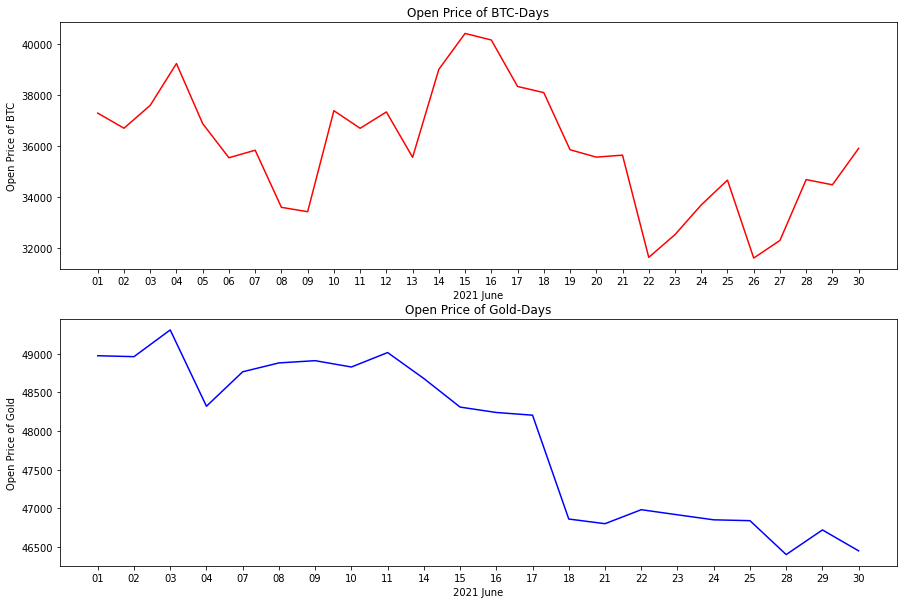

In [ ]:
plt.figure(figsize=(15,10))

df3_copy = df3.Date.str
df3_copy = df3_copy[8:10]

dfGold_copy = df_gold.Date.str
dfGold_copy = dfGold_copy[8:10]


plt.subplot(2,1,1)   
plt.plot(df3_copy[2955:2985],df3.Open[2955:2985],color="r") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of BTC")
plt.title("Open Price of BTC-Days")


plt.subplot(2,1,2)   
plt.plot(dfGold_copy[1920:1942],df_gold.Open[1920:1942],color="BLUE") 
plt.xlabel("2021 June")
plt.ylabel("Open Price of Gold")
plt.title("Open Price of Gold-Days")

plt.show()

## Future Work

<font color="white">
The future goal of this project is to complete "Statistical Analysis and Hypothesis Testing" part. Statistical tests is used to help to make price prediction. One of the statistical test is related to different features such as volume and close price affect or not the opening price of next day. Then, hypothesis test is done to check the usefulness of our findings. After completing this part, the last part which is called "Machine Learning" will be done. In machine learning part, machine is teached to predict price of Bitcoin. Cases such a prediction of daily price for a month and such a recommendation system to decide buy or not buy Bitcoin will be done in this part.<br>
</font>

##Statistical Analysis & Hypothesis Testing


```
# Statistical tests to check how (or if) the volume and close features (in both single and combined manner) contributes to opening price of the next day.

```

---



*   Null Hypothesis ( 𝐻0 ): Volume does not contribute to the Openning price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ): Volume does contribute to the Oppening price of the next day.



In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
volume=df.Volume
print(f"mean  of Volume of bitcoin: {volume.mean():.2f}")

mean  of Volume of bitcoin: 14894427877.56


In [ ]:
open=df.Open
print(f"mean of openning price of bitcoin: {open.mean():.2f}")

mean of openning price of bitcoin: 11768.66


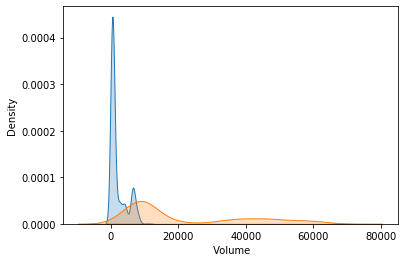

In [ ]:
median_value = df["Volume"].median()
test_group_df = df[df["Volume"] <= median_value]
rest_group_df = df[df["Volume"] >  median_value]

ax = sns.kdeplot(test_group_df["Open"].rename(" Volume"), shade=True)
sns.kdeplot(rest_group_df["Open"].rename("Volume"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group_df["Open"]
rest_group_values = rest_group_df["Open"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Volume does contribute to Open price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Volume does not  contribute to Open price of the next day.")

P value:  3.35E-231
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Volume does contribute to Open price of the next day.




*   Null Hypothesis ( 𝐻0 ): Close price does not contribute to the Openning price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ): Close price  does contribute to the Oppening price of the next day.



In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
close=df.Close
print(f"mean  of close price of bitcoin: {close.mean():.2f}")

mean  of close price of bitcoin: 11783.73


In [ ]:
open=df.Open
print(f"mean  of open price  of bitcoin: {open.mean():.2f}")

mean  of open price  of bitcoin: 11768.66


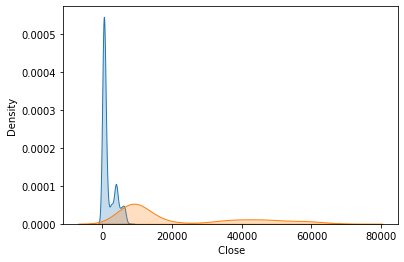

In [ ]:
median_value = df["Close"].median()
test_group = df[df["Close"] <= median_value]
rest_group = df[df["Close"] >  median_value]

ax = sns.kdeplot(test_group["Open"].rename(" Close"), shade=True)
sns.kdeplot(rest_group["Open"].rename("Close"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group["Open"]
rest_group_values = rest_group["Open"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Close price does contribute to Open price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Close price does not  contribute to Open price of the next day.")

P value:  8.40E-246
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Close price does contribute to Open price of the next day.




*   Null Hypothesis ( 𝐻0 ): Volume and Close price does not contribute to the Openning price of the next day together.
*   Alternative Hypothesis ( 𝐻𝐴 ): Volume and Close price does contribute to the Opening price of the next day together.



In [ ]:
from datetime import date
from datetime import datetime
filename = "BTC-USD.csv"
df7 = pd.read_csv(join(path_prefix, filename))



df7["tog"] = df7["Close"] + df7["Volume"]
print("The mean of Close price and Volume")
df7["tog"].mean()


The mean of Close price and Volume


14894439661.287678

In [ ]:
df7.head()

,Date,Open,High,Low,Close,Adj Close,Volume,tog
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2.105726e+07
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,3.448362e+07
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,3.792009e+07
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,3.686401e+07
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2.658050e+07


In [ ]:

open=df7.Open
print(f"mean  of open price of bitcoin: {open.mean():.2f}")

mean  of open price of bitcoin: 11768.66


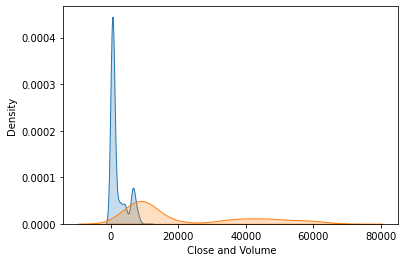

In [ ]:
median_value = df7["tog"].median()
test_group = df7[df7["tog"] <= median_value]
rest_group = df7[df7["tog"] >  median_value]

ax = sns.kdeplot(test_group["Open"].rename(" Close and Volume"), shade=True)
sns.kdeplot(rest_group["Open"].rename("Close and Volume"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group["Open"]
rest_group_values = rest_group["Open"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Close price and Volume does contribute to Open price of the next day together.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Close price and Volume does not contribute to Open price of the next day together.")

P value:  3.35E-231
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Close price and Volume does contribute to Open price of the next day together.


```
# Statistical tests to check if significant differences exist between different months of a single year and same month of different years

```

---



 

* $\large H_0: \mu_d = 0$ d: difference between Open price of different months in a single year.
- $\large H_A: \mu_d > 0$






In [ ]:
from datetime import date
from datetime import datetime
filename = "BTC-USD.csv"
df5 = pd.read_csv(join(path_prefix, filename))
df5['Date'] = pd.to_datetime(df5['Date'])
new_df = df5.loc[(df5.Date.dt.month == 9) & (df5.Date.dt.year == 2014)]
#print(new_df)
test_type = "Open"
september= new_df[test_type]
#print(september)
print(f"mean score of open price in september of 2014: {september.mean():.2f}")



mean score of open price in september of 2014: 412.65


In [ ]:
new = df5.loc[(df5.Date.dt.month == 12) & (df5.Date.dt.year == 2014)]
test_type = "Open"
december= new[test_type]
print(f"mean score of open price in december of 2014: {december.mean():.2f}")


mean score of open price in december of 2014: 343.07


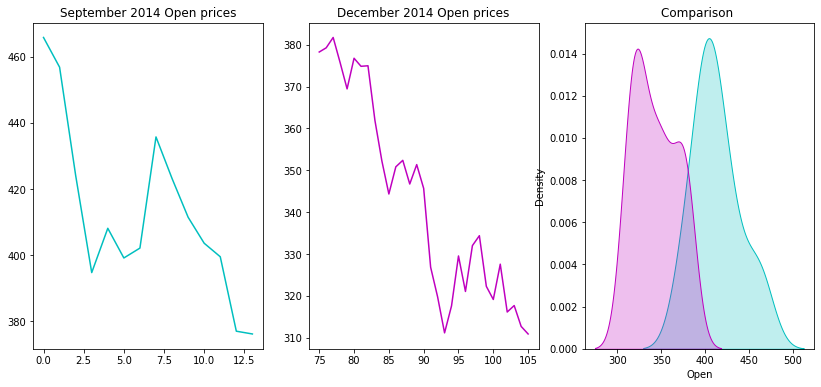

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
        
september.plot(kind="line", ax=ax[0],  label="september", color="c")
ax[0].set_title("September 2014 Open prices")

december.plot(kind="line", ax=ax[1], label="december", color="m")
ax[1].set_title("December 2014 Open prices")

sns.kdeplot(september, shade=True, label="september", ax=ax[2], color="c")
sns.kdeplot(december, shade=True, label="december", ax=ax[2], color="m")
ax[2].set_title("Comparison ")


plt.show()

In [ ]:

signifance=0.05

_, p_value = stats.ttest_ind(a=september, b=december, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, diffrence between open price of diffrents months in a single year is positive.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, diffrence between open price of diffrents months in a single year is zero.")

P value:  1.71E-08
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, diffrence between open price of diffrents months in a single year is positive.




 

* $\large H_0: \mu_d = 0$ d: difference between Open price of same months in  diffrent years.
- $\large H_A: \mu_d > 0$






In [ ]:
from datetime import date
from datetime import datetime
filename = "BTC-USD.csv"
df6 = pd.read_csv(join(path_prefix, filename))
df6['Date'] = pd.to_datetime(df5['Date'])
new_dff = df6.loc[(df6.Date.dt.month == 1) & (df6.Date.dt.year == 2015)]
#print(new_dff)
test_type = "Open"
fifteen= new_dff[test_type]
#print(fifteen)
print(f"mean score of open price in january of 2015: {fifteen.mean():.2f}")



mean score of open price in january of 2015: 251.80


In [ ]:
neww = df6.loc[(df6.Date.dt.month == 1) & (df6.Date.dt.year == 2016)]
test_type = "Open"
sixteen= neww[test_type]
print(f"mean score of open price in january of 2016: {sixteen.mean():.2f}")

mean score of open price in january of 2016: 412.81


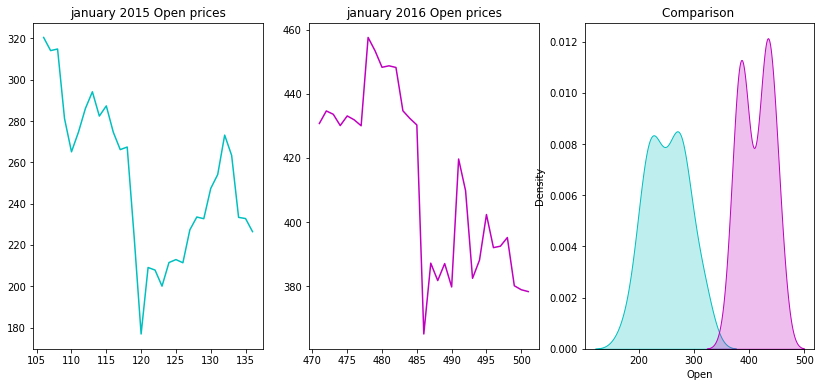

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(14,6))  
        
fifteen.plot(kind="line", ax=ax[0],  label="2015", color="c")
ax[0].set_title("january 2015 Open prices")

sixteen.plot(kind="line", ax=ax[1], label="december", color="m")
ax[1].set_title("january 2016 Open prices")

sns.kdeplot(fifteen, shade=True, label="september", ax=ax[2], color="c")
sns.kdeplot(sixteen, shade=True, label="december", ax=ax[2], color="m")
ax[2].set_title("Comparison ")


plt.show()

In [ ]:

signifance=0.05

_, p_value = stats.ttest_ind(a=fifteen, b=sixteen, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, diffrence between open price of same months in diffrent years is positive.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, diffrence between open price of same months in diffrent years is zero.")

P value:  2.11E-26
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, diffrence between open price of same months in diffrent years is positive.


```
# Statistical tests to investigate whether there exists significant statistical difference between close price and low price of the same day

```

---





*   Null Hypothesis ( 𝐻0 ): Close Price does not contribute to the Low Price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ):
Close Price does contribute to the Low Price of the next day.





In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
close=df.Close
print(f"mean  of oclose price of bitcoin: {close.mean():.2f}")

mean  of oclose price of bitcoin: 11783.73


In [ ]:
low=df.Low
print(f"mean  of Low price of bitcoin: {low.mean():.2f}")

mean  of Low price of bitcoin: 11425.23


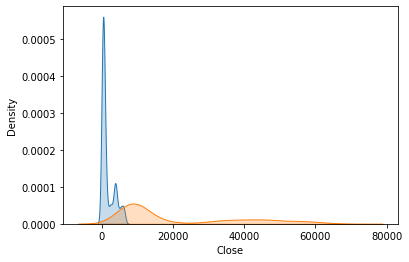

In [ ]:
median_value = df["Close"].median()
test_group_df = df[df["Close"] <= median_value]
rest_group_df = df[df["Close"] >  median_value]

ax = sns.kdeplot(test_group_df["Low"].rename("Close"), shade=True)
sns.kdeplot(rest_group_df["Low"].rename("Close"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group["Low"]
rest_group_values = rest_group["Low"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Close price does contribute to Low price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Close price does not contribute to Low price of the next day.")

P value:  7.15E-231
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Close price does contribute to Low price of the next day.


```
# Statistical tests to investigate whether there exists significant statistical difference between close price and high price of the same day

```

---





*   Null Hypothesis ( 𝐻0 ): Close Price does not contribute to the High Price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ):
Close Price does contribute to the High Price of the next day.





In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
close=df.Close
print(f"mean  of close price of bitcoin: {close.mean():.2f}")

mean  of close price of bitcoin: 11783.73


In [ ]:
high=df.High
print(f"mean  of high price of bitcoin: {high.mean():.2f}")

mean  of high price of bitcoin: 12082.90


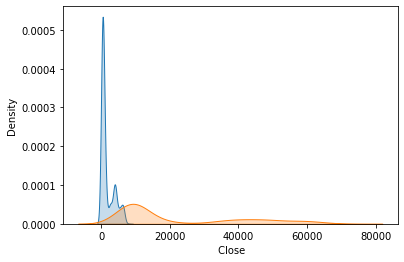

In [ ]:
median_value = df["Close"].median()
test_group_df = df[df["Close"] <= median_value]
rest_group_df = df[df["Close"] >  median_value]

ax = sns.kdeplot(test_group_df["High"].rename(" Close"), shade=True)
sns.kdeplot(rest_group_df["High"].rename("Close"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group["High"]
rest_group_values = rest_group["High"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Close price does contribute to High price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Close price does not contribute to High price of the next day.")

P value:  1.02E-231
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Close price does contribute to High price of the next day.


```
# Statistical tests to check how the close and volume features affects metrics like open prices of next day, and how open price affects high and low prices of that day

```

---



---



*   Null Hypothesis ( 𝐻0 ): Openning Price does not contribute to the High Price of the next day. 
*   Alternative Hypothesis ( 𝐻𝐴 ): : Openning Price does contribute to the High Price of the next day.



In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
open=df.Open
print(f"mean  of open of bitcoin: {open.mean():.2f}")

mean  of open of bitcoin: 11768.66


In [ ]:
high=df.High
print(f"mean  of High price of bitcoin: {high.mean():.2f}")

mean  of High price of bitcoin: 12082.90


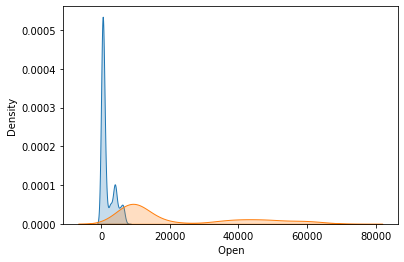

In [ ]:
median_value = df["Open"].median()
test_group_df = df[df["Open"] <= median_value]
rest_group_df = df[df["Open"] >  median_value]

ax = sns.kdeplot(test_group_df["High"].rename(" Open"), shade=True)
sns.kdeplot(rest_group_df["High"].rename("Open"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group["High"]
rest_group_values = rest_group["High"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Open price does contribute to High price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Open price does not  contribute to High price of the next day.")

P value:  1.02E-231
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Open price does contribute to High price of the next day.




---



*   Null Hypothesis ( 𝐻0 ): Openning Price does not contribute to the Low Price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ): 
*   Null Hypothesis ( 𝐻0 ): Openning Price does contribute to the Low Price of the next day.



In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [ ]:
open=df.Open
print(f"mean  of open of bitcoin: {open.mean():.2f}")

mean  of open of bitcoin: 11768.66


In [ ]:
low=df.Low
print(f"mean  of High price of bitcoin: {low.mean():.2f}")

mean  of High price of bitcoin: 11425.23


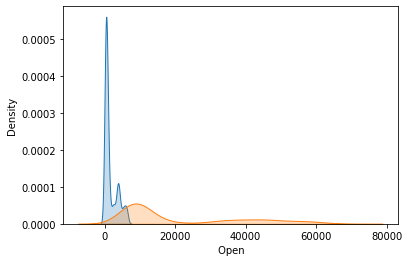

In [ ]:
median_value = df["Open"].median()
test_group_df = df[df["Open"] <= median_value]
rest_group_df = df[df["Open"] >  median_value]

ax = sns.kdeplot(test_group_df["Low"].rename(" Open"), shade=True)
sns.kdeplot(rest_group_df["Low"].rename("Open"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group["Low"]
rest_group_values = rest_group["Low"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Open price does contribute to Low price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Open price does not  contribute to Low price of the next day.")

P value:  7.15E-231
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Open price does contribute to Low price of the next day.


```
# Utilizing at least four new features using extra datasets in hypothesis testing

```

---

In [ ]:
fnameAdd2 = "coin_Bitcoin.csv"
df3 = pd.read_csv(join(path_prefix, fnameAdd2))



*   Null Hypothesis ( 𝐻0 ): Marketcap does not contribute to the Openning price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ): Marketcap does contribute to the Oppening price of the next day.



In [ ]:
df3.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
marketcap=df3.Marketcap
print(f"mean  of Marketcap of bitcoin: {marketcap.mean():.2f}")

mean  of Volume of bitcoin: 120876059112.88


In [ ]:
open=df3.Open
print(f"mean of openning price of bitcoin: {open.mean():.2f}")

mean of openning price of bitcoin: 6700.15


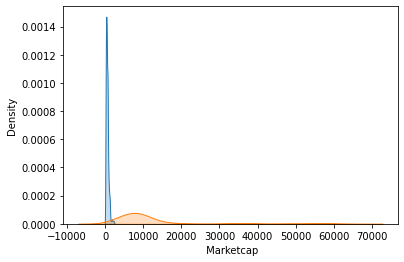

In [ ]:
median_value = df3["Marketcap"].median()
test_group_df = df3[df3["Marketcap"] <= median_value]
rest_group_df = df3[df3["Marketcap"] >  median_value]

ax = sns.kdeplot(test_group_df["Open"].rename(" Marketcap"), shade=True)
sns.kdeplot(rest_group_df["Open"].rename("Marketcap"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group_df["Open"]
rest_group_values = rest_group_df["Open"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Marketcap does contribute to Open price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Marketcap does not  contribute to Open price of the next day.")

P value:  2.96E-204
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Marketcap does contribute to Open price of the next day.




*   Null Hypothesis ( 𝐻0 ): Marketcap does not contribute to the Close price of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ): Marketcap does contribute to the Close price of the next day.



In [ ]:
df3.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
marketcap=df3.Marketcap
print(f"mean  of Marketcap of bitcoin: {marketcap.mean():.2f}")

mean  of Marketcap of bitcoin: 120876059112.88


In [ ]:
close=df3.Close
print(f"mean of openning price of bitcoin: {close.mean():.2f}")

mean of openning price of bitcoin: 6711.29


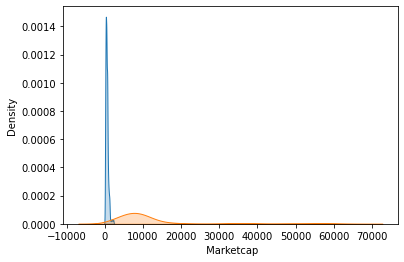

In [ ]:
median_value = df3["Marketcap"].median()
test_group_df = df3[df3["Marketcap"] <= median_value]
rest_group_df = df3[df3["Marketcap"] >  median_value]

ax = sns.kdeplot(test_group_df["Close"].rename(" Marketcap"), shade=True)
sns.kdeplot(rest_group_df["Close"].rename("Marketcap"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group_df["Close"]
rest_group_values = rest_group_df["Close"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Marketcap does contribute to Close price of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Marketcap does not  contribute to Close price of the next day.")

P value:  1.45E-204
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Marketcap does contribute to Close price of the next day.




*   Null Hypothesis ( 𝐻0 ): High price does not contribute to the Marketcap of the next day.
*   Alternative Hypothesis ( 𝐻𝐴 ): High price does contribute to the Marketcap of the next day.



In [ ]:
df3.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
high=df3.High
print(f"mean of openning price of bitcoin: {high.mean():.2f}")

mean of openning price of bitcoin: 6893.33


In [ ]:
marketcap=df3.Marketcap
print(f"mean  of Marketcap of bitcoin: {marketcap.mean():.2f}")

mean  of Marketcap of bitcoin: 120876059112.88


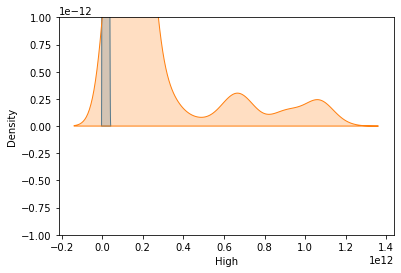

In [ ]:
median_value = df3["High"].median()
test_group_df = df3[df3["High"] <= median_value]
rest_group_df = df3[df3["High"] >  median_value]

ax = sns.kdeplot(test_group_df["Marketcap"].rename("High"), shade=True)
sns.kdeplot(rest_group_df["Marketcap"].rename("High"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group_df["Marketcap"]
rest_group_values = rest_group_df["Marketcap"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, High price does contribute to Marketcap of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, High price does not contribute to Marketcap of the next day.")

P value:  8.90E-196
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, High price does contribute to Marketcap of the next day.


Null Hypothesis ( 𝐻0 ): Low price does not contribute to the Marketcap of the next day.

Alternative Hypothesis ( 𝐻𝐴 ): Low price does contribute to the Marketcap of the next day.

In [ ]:
df3.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [ ]:
marketcap=df3.Marketcap
print(f"mean  of Marketcap of bitcoin: {marketcap.mean():.2f}")

mean  of Marketcap of bitcoin: 120876059112.88


In [ ]:
low=df3.Low
print(f"mean of openning price of bitcoin: {open.mean():.2f}")

mean of openning price of bitcoin: 6700.15


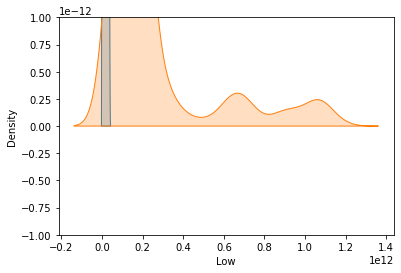

In [ ]:
median_value = df3["Low"].median()
test_group_df = df3[df3["Low"] <= median_value]
rest_group_df = df3[df3["Low"] >  median_value]

ax = sns.kdeplot(test_group_df["Marketcap"].rename("Low"), shade=True)
sns.kdeplot(rest_group_df["Marketcap"].rename("Low"),  ax=ax, shade=True)
plt.show()

In [ ]:
signifance=0.05
test_group_values = test_group_df["Marketcap"]
rest_group_values = rest_group_df["Marketcap"]

_, p_value = stats.ttest_ind(a=test_group_values, b=rest_group_values, equal_var=False)
print("P value: ",format(p_value,".2E"))
print("Signifance Level:", signifance)
if (p_value < signifance):
  print("Based on current value of p value we reject null hypothesis, Low price does contribute to Marketcap of the next day.")
else:
   print("Based on current value of p value we fail to reject null hypothesis, Low price does not contribute to Marketcap of the next day.")

P value:  8.87E-196
Signifance Level: 0.05
Based on current value of p value we reject null hypothesis, Low price does contribute to Marketcap of the next day.


##MACHINE LEARNING


In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2204

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.67311813],
       [0.68414325],
       [0.68750371]])

In [ ]:
train_data = scaled_data[0:training_data_len,:]
x_train =  []
y_train = []

for i in range(30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<=31:
    print(x_train)
    print(y_train)
    print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393])]
[0.0030517716221723024]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393]), array([0.00365546, 0.00321557, 0.00342492, 0.0032753 , 0.00332473,
       0.0038239 , 0.00363714, 0.00346454, 0.00335845, 0.00328567,
       0.00295417, 0.00292874, 

In [ ]:
x_train, y_train = np.array(x_train),np.array(y_train)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2174, 30, 1)

In [ ]:
#Build the LTSM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

2174/2174 [==============================] - 55s 23ms/step - loss: 2.0816e-04


In [ ]:
test_data = scaled_data[training_data_len - 30:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i,0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

2942.3832291020867


Our data takes the last 30 days and predict the close price of all years by this data
*   0=2014
*   500=2015
*   1000=2016
*   1500=2017
*  2000=2018
*  2500=2019


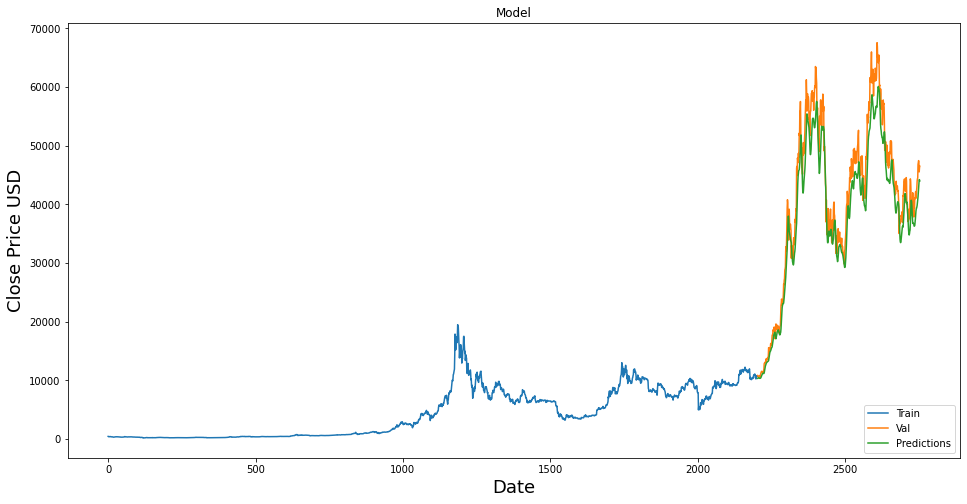

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
2204,10844.640625,11611.391602
2205,10784.491211,11638.394531
2206,10619.452148,11630.589844
2207,10575.974609,11534.376953
2208,10549.329102,11436.246094
...,...,...
2750,47465.730469,45959.636719
2751,47062.664063,46323.000000
2752,45538.675781,45946.562500
2753,46281.644531,44545.457031
